<a href="https://colab.research.google.com/github/Nazneen-akram/NED-Data-Science-Artificial-Intelligence/blob/main/breast_cancer_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
import plotly.express as px

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, precision_score, accuracy_score, recall_score, balanced_accuracy_score

import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Model

In [2]:
from google.colab import files

# Upload kaggle.json file
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json  # set permissions

In [4]:
!kaggle datasets download -d yasserh/breast-cancer-dataset

  0% 0.00/48.6k [00:00<?, ?B/s]
100% 48.6k/48.6k [00:00<00:00, 16.6MB/s]


In [5]:
!unzip breast-cancer-dataset.zip

Archive:  breast-cancer-dataset.zip
  inflating: breast-cancer.csv       


In [6]:
df = pd.read_csv('breast-cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
df.describe().T.style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

,count,mean,std,min,25%,50%,75%,max
id,569.000000,30371831.432337,125020585.612224,8670.000000,869218.000000,906024.000000,8813129.000000,911320502.000000
radius_mean,569.000000,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.110000
texture_mean,569.000000,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.280000
perimeter_mean,569.000000,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.500000
area_mean,569.000000,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.000000
smoothness_mean,569.000000,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.163400
compactness_mean,569.000000,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.345400
concavity_mean,569.000000,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.426800
concave points_mean,569.000000,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.201200
symmetry_mean,569.000000,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.304000


In [8]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

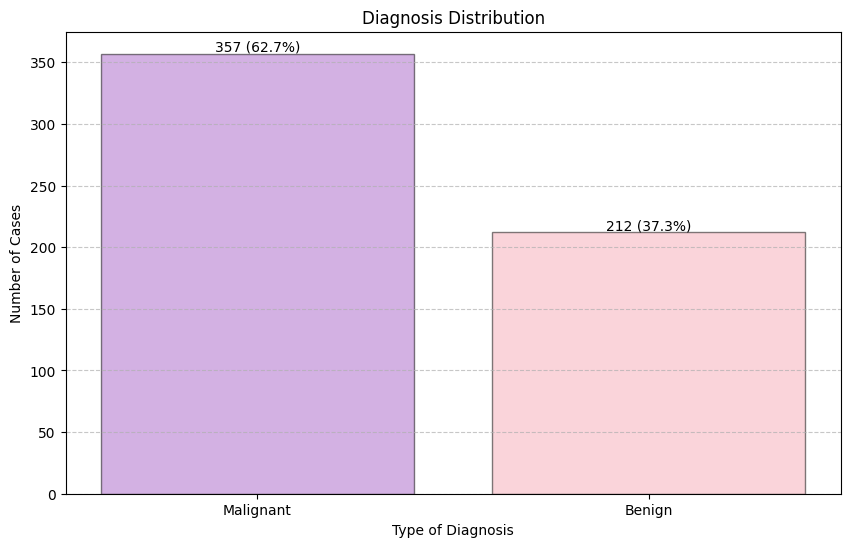

In [16]:
diagnosis_counts = df['diagnosis'].value_counts()
diagnosis_labels = ['Malignant', 'Benign']

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(diagnosis_labels, diagnosis_counts, color=['#A865C9', '#f6abb6'], edgecolor='black', alpha=0.5)

# Customize the plot
plt.title('Diagnosis Distribution')
plt.xlabel('Type of Diagnosis')
plt.ylabel('Number of Cases')

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add percentage labels to the bars
for i, count in enumerate(diagnosis_counts):
    percentage = '{:.1f}%'.format(100 * count / len(df))
    plt.text(i, count, f'{count} ({percentage})', ha='center', va='bottom')

# Show the plot
plt.show()

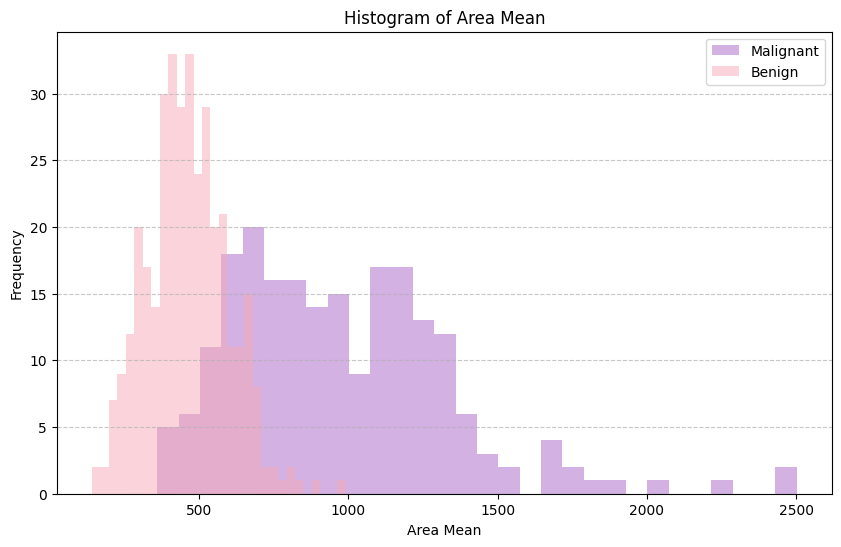

In [21]:
plt.figure(figsize=(10, 6))

# Create a histogram for 'Malignant'
malignant = df[df['diagnosis'] == 'M']['area_mean']
plt.hist(malignant, bins=30, color='#A865C9', alpha=0.5, label='Malignant')

# Create a histogram for 'Benign'
benign = df[df['diagnosis'] == 'B']['area_mean']
plt.hist(benign, bins=30, color='#f6abb6', alpha=0.5, label='Benign')

# Customize the plot
plt.title('Histogram of Area Mean')
plt.xlabel('Area Mean')
plt.ylabel('Frequency')
plt.legend()

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

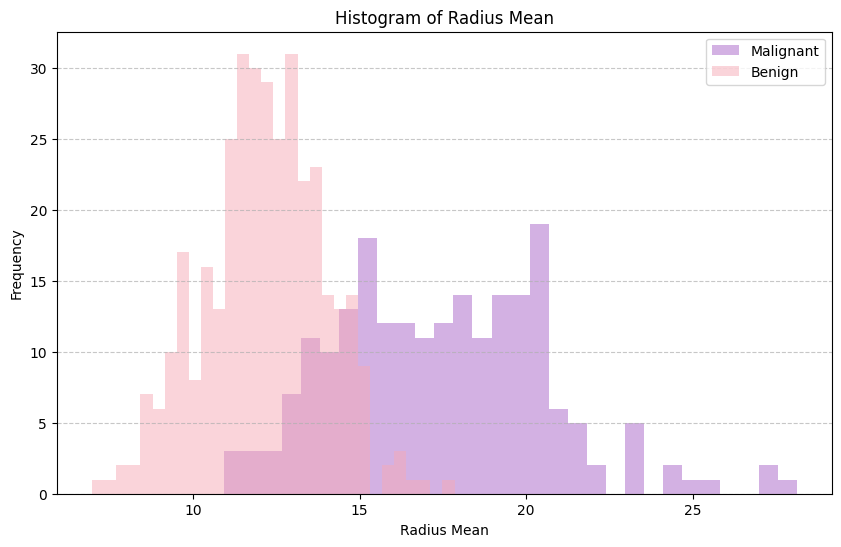

In [25]:
plt.figure(figsize=(10, 6))

# Create a histogram for 'Malignant'
malignant = df[df['diagnosis'] == 'M']['radius_mean']
plt.hist(malignant, bins=30, color='#A865C9', alpha=0.5, label='Malignant')

# Create a histogram for 'Benign'
benign = df[df['diagnosis'] == 'B']['radius_mean']
plt.hist(benign, bins=30, color='#f6abb6', alpha=0.5, label='Benign')

# Customize the plot
plt.title('Histogram of Radius Mean')
plt.xlabel('Radius Mean')
plt.ylabel('Frequency')
plt.legend()

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

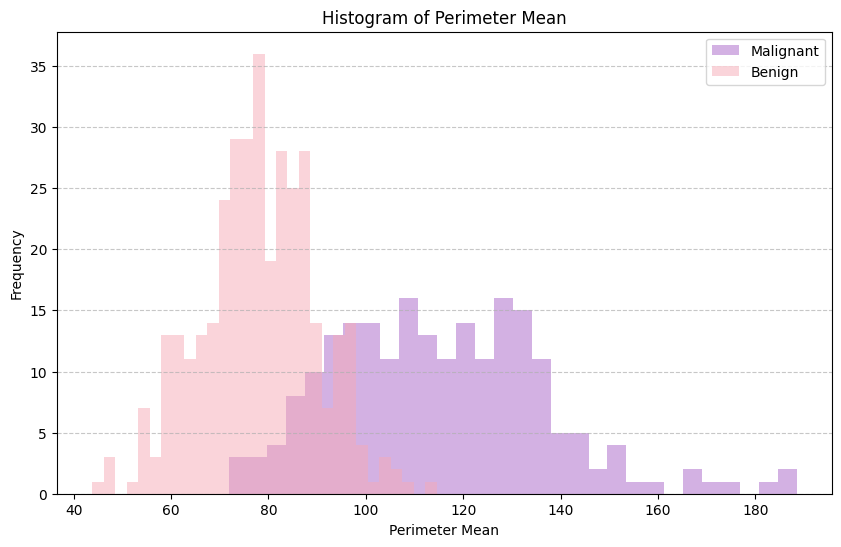

In [26]:
plt.figure(figsize=(10, 6))

# Create a histogram for 'Malignant'
malignant = df[df['diagnosis'] == 'M']['perimeter_mean']
plt.hist(malignant, bins=30, color='#A865C9', alpha=0.5, label='Malignant')

# Create a histogram for 'Benign'
benign = df[df['diagnosis'] == 'B']['perimeter_mean']
plt.hist(benign, bins=30, color='#f6abb6', alpha=0.5, label='Benign')

# Customize the plot
plt.title('Histogram of Perimeter Mean')
plt.xlabel('Perimeter Mean')
plt.ylabel('Frequency')
plt.legend()

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

In [ ]:
fig_5 = px.histogram(data_frame=df,x='smoothness_mean',color='diagnosis_long',color_discrete_sequence=['#A865C9','#f6abb6'])
fig_5.show()

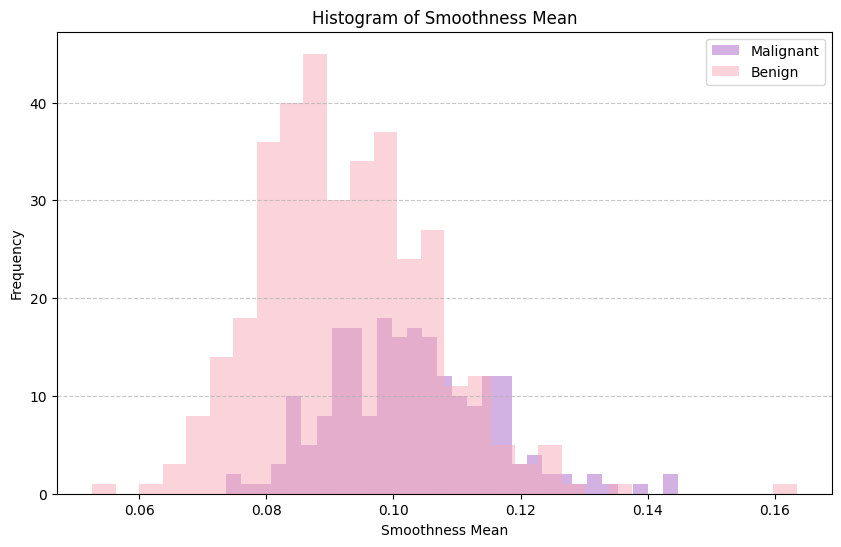

In [27]:
plt.figure(figsize=(10, 6))

# Create a histogram for 'Malignant'
malignant = df[df['diagnosis'] == 'M']['smoothness_mean']
plt.hist(malignant, bins=30, color='#A865C9', alpha=0.5, label='Malignant')

# Create a histogram for 'Benign'
benign = df[df['diagnosis'] == 'B']['smoothness_mean']
plt.hist(benign, bins=30, color='#f6abb6', alpha=0.5, label='Benign')

# Customize the plot
plt.title('Histogram of Smoothness Mean')
plt.xlabel('Smoothness Mean')
plt.ylabel('Frequency')
plt.legend()

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

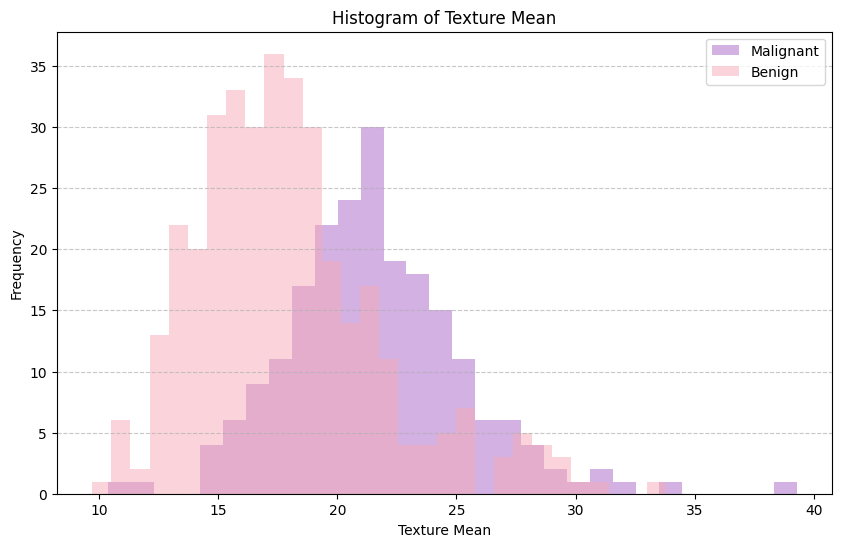

In [28]:
plt.figure(figsize=(10, 6))

# Create a histogram for 'Malignant'
malignant = df[df['diagnosis'] == 'M']['texture_mean']
plt.hist(malignant, bins=30, color='#A865C9', alpha=0.5, label='Malignant')

# Create a histogram for 'Benign'
benign = df[df['diagnosis'] == 'B']['texture_mean']
plt.hist(benign, bins=30, color='#f6abb6', alpha=0.5, label='Benign')

# Customize the plot
plt.title('Histogram of Texture Mean')
plt.xlabel('Texture Mean')
plt.ylabel('Frequency')
plt.legend()

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

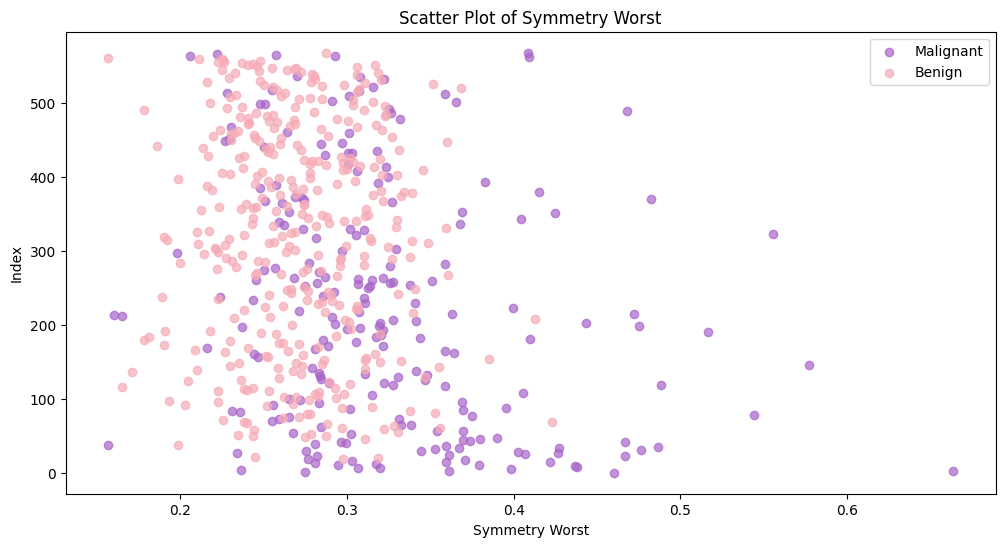

In [42]:
plt.figure(figsize=(12, 6))

# Scatter plot with 'symmetry_worst' on the x-axis and DataFrame index on the y-axis
malignant = df[df['diagnosis'] == 'M']['symmetry_worst']
plt.scatter(malignant, malignant.index, color='#A865C9', label='Malignant',alpha=0.7)

benign = df[df['diagnosis'] == 'B']['symmetry_worst']
plt.scatter(benign, benign.index, color='#f6abb6', label='Benign',alpha=0.7)

# Customize the plot
plt.title('Scatter Plot of Symmetry Worst')
plt.xlabel('Symmetry Worst')
plt.ylabel('Index')

# Add the legend
plt.legend()

# Show the plot
plt.show()

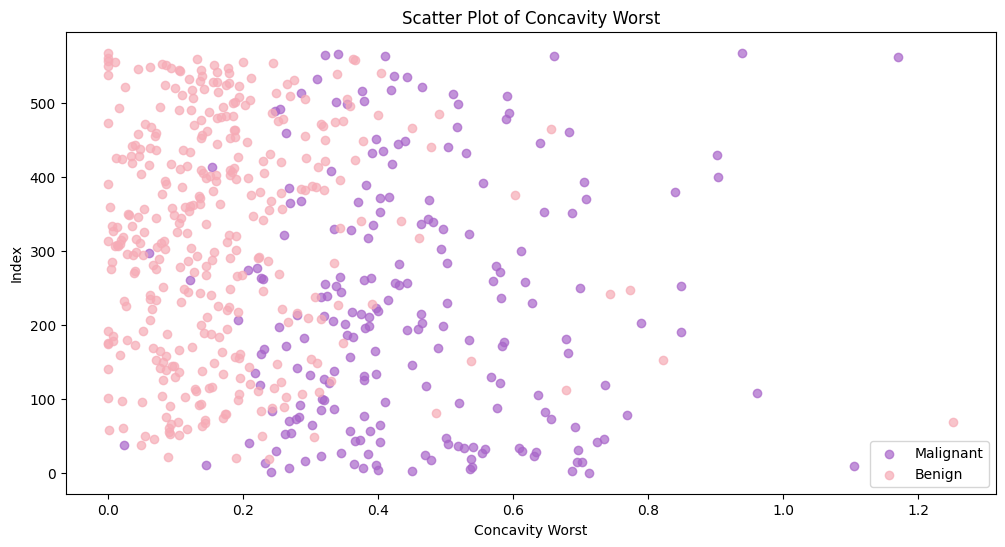

In [44]:
plt.figure(figsize=(12, 6))

# Scatter plot with 'symmetry_worst' on the x-axis and DataFrame index on the y-axis
malignant = df[df['diagnosis'] == 'M']['concavity_worst']
plt.scatter(malignant, malignant.index, color='#A865C9', label='Malignant',alpha=0.7)

benign = df[df['diagnosis'] == 'B']['concavity_worst']
plt.scatter(benign, benign.index, color='#f6abb6', label='Benign',alpha=0.7)

# Customize the plot
plt.title('Scatter Plot of Concavity Worst')
plt.xlabel('Concavity Worst')
plt.ylabel('Index')

# Add the legend
plt.legend()

# Show the plot
plt.show()

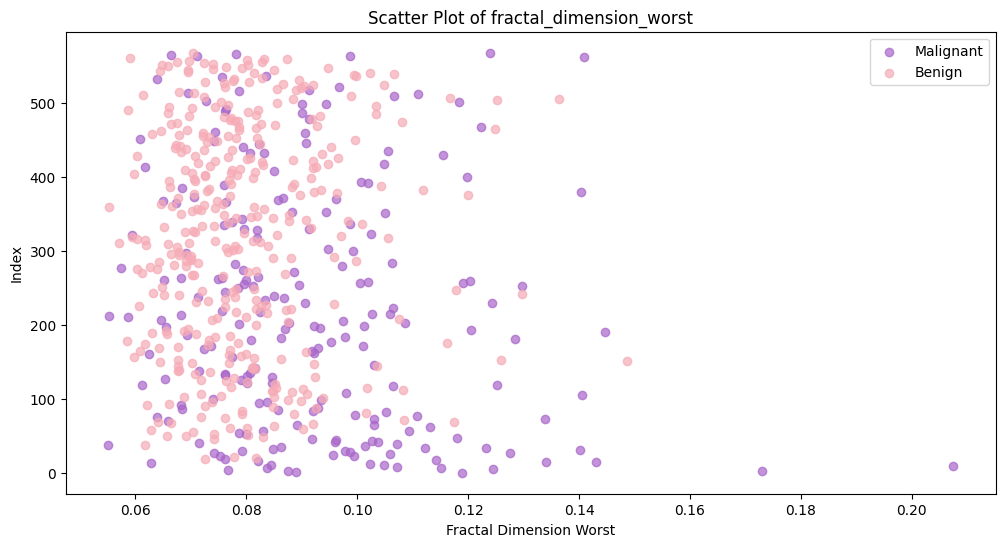

In [46]:
plt.figure(figsize=(12, 6))

# Scatter plot with 'symmetry_worst' on the x-axis and DataFrame index on the y-axis
malignant = df[df['diagnosis'] == 'M']['fractal_dimension_worst']
plt.scatter(malignant, malignant.index, color='#A865C9', label='Malignant',alpha=0.7)

benign = df[df['diagnosis'] == 'B']['fractal_dimension_worst']
plt.scatter(benign, benign.index, color='#f6abb6', label='Benign',alpha=0.7)

# Customize the plot
plt.title('Scatter Plot of fractal_dimension_worst')
plt.xlabel('Fractal Dimension Worst')
plt.ylabel('Index')

# Add the legend
plt.legend()

# Show the plot
plt.show()

In [47]:
df.drop('id', axis=1, inplace=True)

In [48]:
df['diagnosis'] = (df['diagnosis'] == 'M').astype(int) #encode the label into 1/0

In [50]:
df.tail()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,0,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [51]:
corr = df.corr()

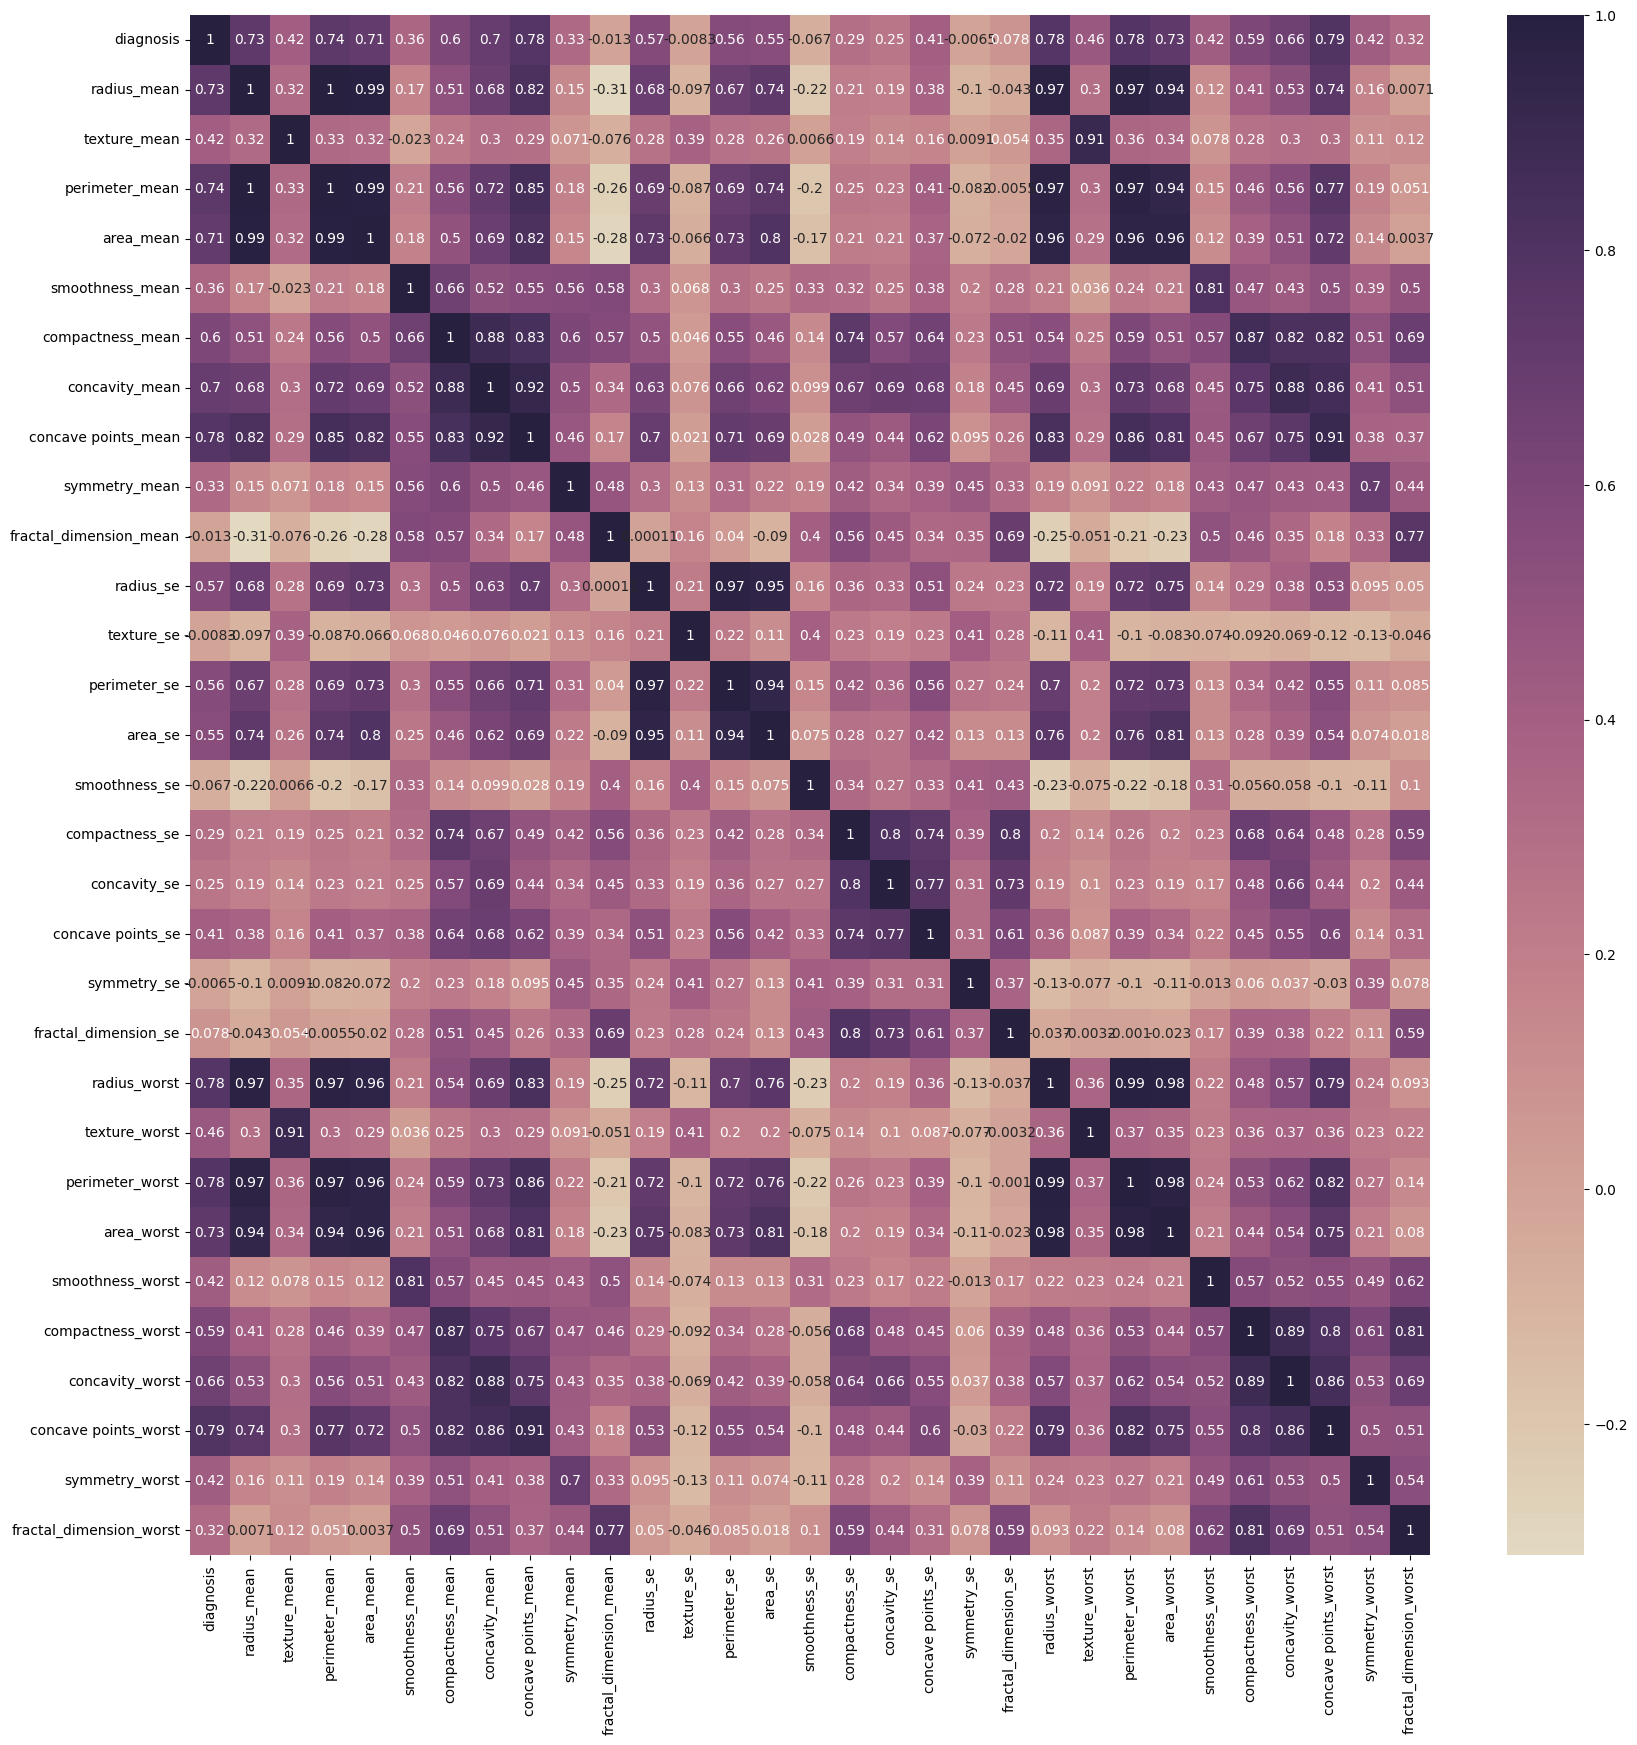

In [54]:
plt.figure(figsize=(20,20))
sns.heatmap(corr, cmap=sns.color_palette("ch:s=-.2,r=.6", as_cmap=True),annot=True)
plt.show()

In [55]:
# Get the absolute value of the correlation
cor_target = abs(corr["diagnosis"])

# Select highly correlated features (thresold = 0.2)
relevant_features = cor_target[cor_target>0.2]

relevant_features

diagnosis                  1.000000
radius_mean                0.730029
texture_mean               0.415185
perimeter_mean             0.742636
area_mean                  0.708984
smoothness_mean            0.358560
compactness_mean           0.596534
concavity_mean             0.696360
concave points_mean        0.776614
symmetry_mean              0.330499
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
compactness_se             0.292999
concavity_se               0.253730
concave points_se          0.408042
radius_worst               0.776454
texture_worst              0.456903
perimeter_worst            0.782914
area_worst                 0.733825
smoothness_worst           0.421465
compactness_worst          0.590998
concavity_worst            0.659610
concave points_worst       0.793566
symmetry_worst             0.416294
fractal_dimension_worst    0.323872
Name: diagnosis, dtype: float64

In [56]:
# Collect the names of the features
names = [index for index, value in relevant_features.items()]
names

# Drop the target variable from the results
names.remove('diagnosis')

### Define Data and Labels

In [57]:
X = df[names]
y = df['diagnosis']

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42) #split the  data into traing and validating

scaler = StandardScaler() #create an instance of standard scaler
scaler.fit(X_train) # fit it to the training data

X_train = scaler.transform(X_train) #transform training data
X_test = scaler.transform(X_test) #transform validation data

### Model Evaluation

In [67]:
def train_evaluate_model(model, X_train, y_train, X_test,y_test):

    model.fit(X_train, y_train)  #fit the model instance


    predictions = model.predict(X_test) # calculate predictions

    #compute metrics for evaluation
    accuracy = accuracy_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    balanced_accuracy = balanced_accuracy_score(y_test, predictions)

    #create a dataframe to visualize the results
    eval_df = pd.DataFrame([[accuracy, f1, precision, recall, balanced_accuracy]], columns=['accuracy', 'f1_score', 'precision', 'recall', 'balanced_accuracy'])
    return eval_df

### Logistic Regression

In [85]:
lg = LogisticRegression()

results = train_evaluate_model(lg, X_train, y_train, X_test, y_test)

In [87]:
results.index = ['LogisticRegression']

In [88]:
results.style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

,accuracy,f1_score,precision,recall,balanced_accuracy
LogisticRegression,0.973684,0.964706,0.976190,0.953488,0.969702


In [79]:
decision_tree = DecisionTreeClassifier()
decision_tree_results = train_evaluate_model(decision_tree,X_train, y_train, X_test, y_test)

decision_tree_results.index = ['DecisionTree']

print(decision_tree_results.dtypes)

accuracy             float64
f1_score             float64
precision            float64
recall               float64
balanced_accuracy    float64
dtype: object


In [89]:
results = pd.concat([results, decision_tree_results])

In [90]:
results

,accuracy,f1_score,precision,recall,balanced_accuracy
LogisticRegression,0.973684,0.964706,0.976190,0.953488,0.969702
DecisionTree,0.912281,0.886364,0.866667,0.906977,0.911235


### KNearestNeighbours

In [91]:
KNN = KNeighborsClassifier(n_neighbors=12)

In [92]:
knn = train_evaluate_model(KNN, X_train, y_train, X_test, y_test)
knn.index =['KNearsNeighbors']
results = pd.concat([results,knn])

In [93]:
results.sort_values(by='f1_score',ascending=False).style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

,accuracy,f1_score,precision,recall,balanced_accuracy
LogisticRegression,0.973684,0.964706,0.976190,0.953488,0.969702
KNearsNeighbors,0.956140,0.941176,0.952381,0.930233,0.951032
DecisionTree,0.912281,0.886364,0.866667,0.906977,0.911235


### RandomForestClassifier

In [94]:
rfc = RandomForestClassifier()

In [96]:
rfc_result = train_evaluate_model(rfc, X_train, y_train, X_test, y_test)
rfc_result.index = ['RandomForest']

results = pd.concat([results,rfc_result])

In [97]:
results.sort_values(by='f1_score',ascending=False).style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

,accuracy,f1_score,precision,recall,balanced_accuracy
LogisticRegression,0.973684,0.964706,0.976190,0.953488,0.969702
RandomForest,0.964912,0.952381,0.975610,0.930233,0.958074
KNearsNeighbors,0.956140,0.941176,0.952381,0.930233,0.951032
DecisionTree,0.912281,0.886364,0.866667,0.906977,0.911235


### XGBoost

In [98]:
xgboost = xgb.XGBClassifier()
xgboost_result = train_evaluate_model(xgboost, X_train, y_train, X_test, y_test)
xgboost_result.index = ['XGBoost']

results = pd.concat([results,xgboost_result])

In [99]:
results.sort_values(by='f1_score',ascending=False).style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

,accuracy,f1_score,precision,recall,balanced_accuracy
LogisticRegression,0.973684,0.964706,0.976190,0.953488,0.969702
RandomForest,0.964912,0.952381,0.975610,0.930233,0.958074
KNearsNeighbors,0.956140,0.941176,0.952381,0.930233,0.951032
XGBoost,0.956140,0.941176,0.952381,0.930233,0.951032
DecisionTree,0.912281,0.886364,0.866667,0.906977,0.911235


### Naive Bayes

In [100]:
Naive_Bayes = GaussianNB()
Naive_Bayes_result = train_evaluate_model(Naive_Bayes, X_train, y_train, X_test, y_test)
Naive_Bayes_result.index = ['NaiveBayes']

results = pd.concat([results,Naive_Bayes_result])

In [101]:
results.head(6).sort_values(by='f1_score',ascending=False).style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

,accuracy,f1_score,precision,recall,balanced_accuracy
LogisticRegression,0.973684,0.964706,0.976190,0.953488,0.969702
RandomForest,0.964912,0.952381,0.975610,0.930233,0.958074
NaiveBayes,0.964912,0.952381,0.975610,0.930233,0.958074
KNearsNeighbors,0.956140,0.941176,0.952381,0.930233,0.951032
XGBoost,0.956140,0.941176,0.952381,0.930233,0.951032
DecisionTree,0.912281,0.886364,0.866667,0.906977,0.911235


In [102]:
initializer = tf.keras.initializers.RandomNormal(seed=0)
def scheduler(epoch, lr):

    if epoch < 50:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

callback = tf.keras.callbacks.LearningRateScheduler(scheduler) # set the callback to our scheduler function

inputs = Input(shape=X.shape[-1])
x= Dense(16,activation='relu',kernel_initializer=tf.keras.initializers.RandomNormal())(inputs)
x = Dropout(0.4)(x)
x= Dense(16,activation='relu',kernel_initializer=tf.keras.initializers.RandomNormal())(inputs)
x = Dropout(0.4)(x)
x = Dense(25,activation='relu',kernel_initializer=tf.keras.initializers.RandomNormal())(x)
x = Dense(1, activation='sigmoid',kernel_initializer=tf.keras.initializers.RandomNormal())(x)
model = Model(inputs=inputs, outputs=x)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train,epochs=140)
predictions = model.predict(X_test)

Epoch 1/140
15/15 [==============================] - 2s 7ms/step - loss: 0.6882 - accuracy: 0.7055
Epoch 2/140
15/15 [==============================] - 0s 5ms/step - loss: 0.6665 - accuracy: 0.8440
Epoch 3/140
15/15 [==============================] - 0s 7ms/step - loss: 0.6131 - accuracy: 0.9143
Epoch 4/140
15/15 [==============================] - 0s 8ms/step - loss: 0.5139 - accuracy: 0.9099
Epoch 5/140
15/15 [==============================] - 0s 10ms/step - loss: 0.3920 - accuracy: 0.9209
Epoch 6/140
15/15 [==============================] - 0s 7ms/step - loss: 0.2724 - accuracy: 0.9275
Epoch 7/140
15/15 [==============================] - 0s 7ms/step - loss: 0.2087 - accuracy: 0.9385
Epoch 8/140
15/15 [==============================] - 0s 5ms/step - loss: 0.1652 - accuracy: 0.9495
Epoch 9/140
15/15 [==============================] - 0s 10ms/step - loss: 0.1486 - accuracy: 0.9538
Epoch 10/140
15/15 [==============================] - 0s 10ms/step - loss: 0.1353 - accuracy: 0.9582
Epoch 

In [103]:
# Generate binary predictions for the test data using the trained neural network model
predictions = model.predict(X_test)
# convert predicted probabilities to binary predictions Note that a threshold of 0.4 was used as recall is more important for medical diagnosis
predictions = (predictions > 0.4)

# Calculate evaluation metrics using the binary predictions and true labels for the test data
accuracy = accuracy_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
balanced_accuracy = balanced_accuracy_score(y_test, predictions)

# Create a pandas dataframe containing the evaluation metric values as a single row
nn_df = pd.DataFrame([[accuracy, f1, precision, recall, balanced_accuracy]],
                     columns=['accuracy', 'f1_score', 'precision', 'recall', 'balanced_accuracy'])

4/4 [==============================] - 0s 3ms/step


In [104]:
nn_df.index = ['NeuralNetwork']
results = pd.concat([results,nn_df])

In [105]:
results.sort_values(by='f1_score',ascending=False).style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

,accuracy,f1_score,precision,recall,balanced_accuracy
NeuralNetwork,0.991228,0.988235,1.000000,0.976744,0.988372
LogisticRegression,0.973684,0.964706,0.976190,0.953488,0.969702
RandomForest,0.964912,0.952381,0.975610,0.930233,0.958074
NaiveBayes,0.964912,0.952381,0.975610,0.930233,0.958074
KNearsNeighbors,0.956140,0.941176,0.952381,0.930233,0.951032
XGBoost,0.956140,0.941176,0.952381,0.930233,0.951032
DecisionTree,0.912281,0.886364,0.866667,0.906977,0.911235


### Trying All Features

In [108]:
X_all_features = df.drop('diagnosis',axis=1)
X_train_all_features, X_test_all_features, y_train, y_test = train_test_split(X_all_features, y, test_size = 0.2, random_state=42) #split the  data into traing and validating
scaler.fit(X_train_all_features) # fit it to the training data

X_train_all_features = scaler.transform(X_train_all_features) #transform training data
X_test_all_features = scaler.transform(X_test_all_features) #transform validation data

In [109]:
LogisticRegression_all_features = train_evaluate_model(lg, X_train_all_features, y_train, X_test_all_features, y_test)

LogisticRegression_all_features.index = ['LogisticRegression_all_features']
results = pd.concat([results,LogisticRegression_all_features])

DecisionTree_all_features = train_evaluate_model(decision_tree, X_train_all_features, y_train, X_test_all_features, y_test)
DecisionTree_all_features.index = ['DecisionTree_all_features']
results = pd.concat([results,DecisionTree_all_features])


KNearsNeighbors_all_features =  train_evaluate_model(KNN, X_train_all_features, y_train, X_test_all_features, y_test)

KNearsNeighbors_all_features.index = ['KNearsNeighbors_all_features']
results = pd.concat([results,KNearsNeighbors_all_features])

RandomForest_all_features = train_evaluate_model(rfc,X_train_all_features, y_train, X_test_all_features, y_test)

RandomForest_all_features.index = ['RandomForest_all_features']
results = pd.concat([results,RandomForest_all_features])


XGBoost_all_features = train_evaluate_model(xgboost,X_train_all_features, y_train, X_test_all_features, y_test)

XGBoost_all_features.index = ['XGBoost_all_features']
results = pd.concat([results,XGBoost_all_features])


Naive_Bayes_all_features = train_evaluate_model(Naive_Bayes,X_train_all_features, y_train, X_test_all_features, y_test)
Naive_Bayes_all_features.index = ['NaiveBayes_all_features']

results = pd.concat([results,Naive_Bayes_all_features])

In [110]:
results.sort_values(by='f1_score',ascending=False).style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

KeyError: ignored